# Case study on Supervised learning

    Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset to the python environment. 

In [6]:
data_Super

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
data_Super.shape

(150, 5)

In [9]:
data_Super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data_Super.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
data_Super.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
data_Super.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Do necessary pre-processing steps.

In [13]:
data_Super.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

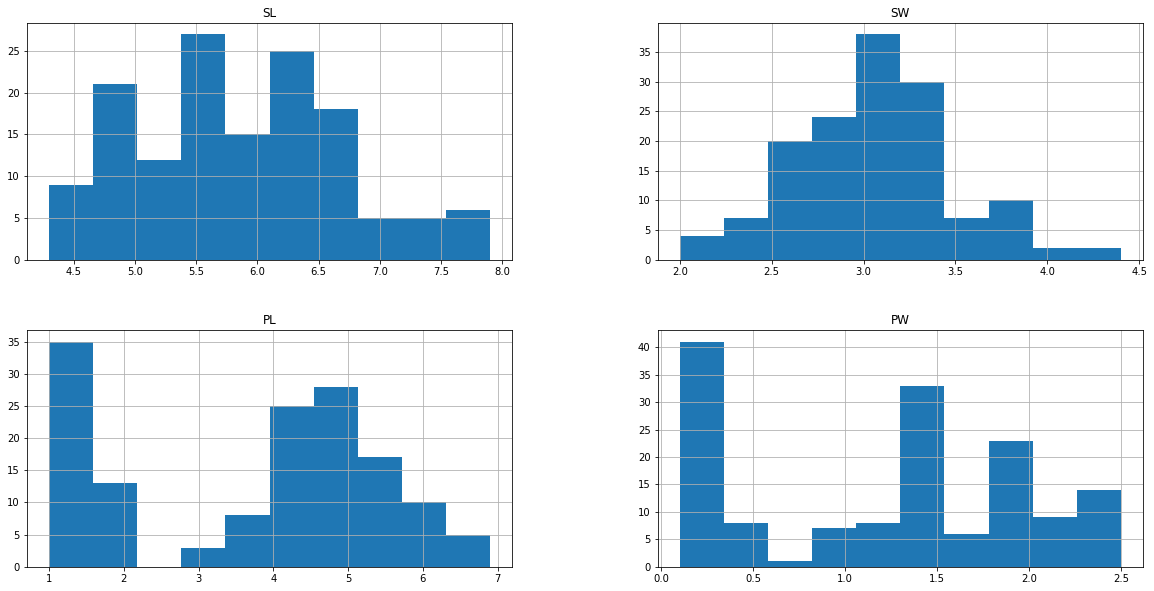

In [15]:
fregraph=data_Super.select_dtypes(include=['float'])
fregraph.hist(figsize=(20,10))

In [16]:
data_Super.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
data_Super['SL']=data_Super['SL'].median()
data_Super['SW']=data_Super['SW'].median()
data_Super['PL']=data_Super['PL'].median()

In [18]:
data_Super.head()

,SL,SW,PL,PW,Classification
0,5.8,3.0,4.35,0.2,Iris-setosa
1,5.8,3.0,4.35,0.2,Iris-setosa
2,5.8,3.0,4.35,0.2,Iris-setosa
3,5.8,3.0,4.35,0.2,Iris-setosa
4,5.8,3.0,4.35,0.2,Iris-setosa


In [19]:
data_Super.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [26]:
x=data_Super.drop(['Classification'],axis=1)
y=pd.DataFrame(data_Super['Classification'])

In [27]:
y['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

In [28]:
x.describe()

,SL,SW,PL,PW
count,1.500000e+02,150.0,1.500000e+02,150.000000
mean,5.800000e+00,3.0,4.350000e+00,1.198667
std,1.425846e-14,0.0,1.247615e-14,0.763161
min,5.800000e+00,3.0,4.350000e+00,0.100000
25%,5.800000e+00,3.0,4.350000e+00,0.300000
50%,5.800000e+00,3.0,4.350000e+00,1.300000
75%,5.800000e+00,3.0,4.350000e+00,1.800000
max,5.800000e+00,3.0,4.350000e+00,2.500000


In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
x = min_max_scaler.fit_transform(x)
x= pd.DataFrame(x)
x.describe()

,0,1,2,3
count,150.0,150.0,150.0,150.000000
mean,0.0,0.0,0.0,0.457778
std,0.0,0.0,0.0,0.317984
min,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.083333
50%,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.708333
max,0.0,0.0,0.0,1.000000


### Find out which classification model gives the best result to predict irisspecies.(also do random forest algorithm) 

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)

C:\Users\Poornima\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [44]:
print("Accuracy Score : " ,accuracy_score(y_test,y_pred))


Accuracy Score :  0.9666666666666667


In [45]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)